In [1]:
import sys
sys.path.insert(0, "../source/")
sys.path.insert(0, "../models/AdvectionDiffusion/settings/AdvectionDiffusion_FEniCS")
sys.path.insert(0, "../models/AdvectionDiffusion/Navigators")
sys.path.insert(0, "../models/AdvectionDiffusion/Detectors")

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import fenics as dl

from InverseProblem import InverseProblem
from FOM_stationary import FOM_stationary as FOM
from Drone import Drone as Drone
from DetectorPointwise import DetectorPointwise as Detector
from NavigationCircle import NavigationCircle as Navigation
from NavigationFreePath import NavigationFreePath as Navigation
from OEDUtility import OEDUtility

%load_ext autoreload
%autoreload 2

import time
tStart_notebook = time.time()

In [2]:
n_para = 5
var_prior = 1 # set to a high value (1e+6) to test convergence in noise-free situations

n_test = 100 # resolution for 1D plots
n_test_2d = 60 # resolution for 2D plots (50: ~1 min runtime for dt = 0.01)

In [3]:
polyDim = 3
fom = FOM(mesh_shape='square', polyDim=polyDim, meshDim=5)

  *** Warning: Found no facets matching domain for boundary condition.
  *** Warning: Found no facets matching domain for boundary condition.
  *** Warning: Found no facets matching domain for boundary condition.
  *** Warning: Found no facets matching domain for boundary condition.
  *** Warning: Found no facets matching domain for boundary condition.
  *** Warning: Found no facets matching domain for boundary condition.
  *** Warning: Found no facets matching domain for boundary condition.
  *** Warning: Found no facets matching domain for boundary condition.
  *** Warning: Found no facets matching domain for boundary condition.


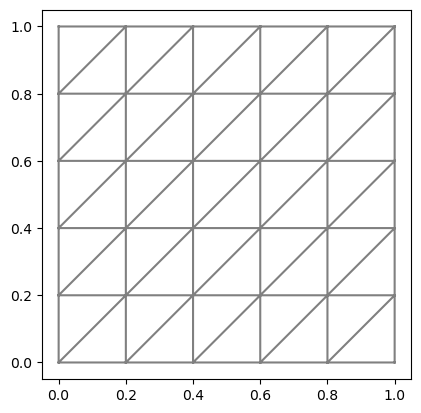

In [4]:
dl.plot(fom.mesh)

  *** Warning: Found no facets matching domain for boundary condition.


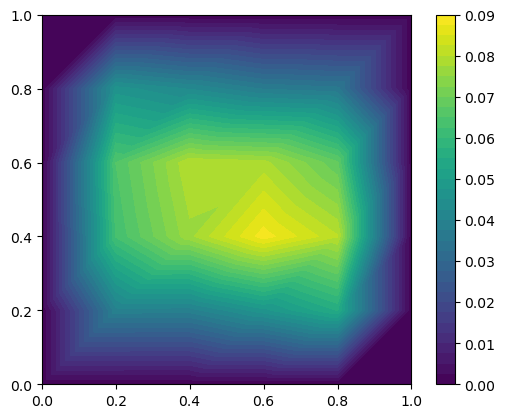

In [5]:
para_true = np.ones((n_para,))
state = fom.solve(parameter=para_true)
fom.plot(state)

In [6]:
x = np.linspace(0, 1-0.001, 101)
y = np.linspace(0.001, 1-0.001, 101)
Z = np.zeros((len(x), len(y)))
Dx_1 = np.zeros((len(x), len(y)))
Dy_1 = np.zeros((len(x), len(y)))
Dx_2 = np.zeros((len(x), len(y)))
Dy_2 = np.zeros((len(x), len(y)))
FDx = np.zeros((len(x), len(y)))
FDy = np.zeros((len(x), len(y)))

Du = dl.grad(state.state)

Du_1 = dl.project(Du, V= dl.VectorFunctionSpace(fom.mesh, "DG", degree = polyDim - 1))
Du_2 = dl.project(Du)

h = 1e-8

for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = state.state(x[i],y[j])
        Dx_1[i,j] = Du_1(x[i], y[j])[0]
        Dy_1[i,j] = Du_1(x[i], y[j])[1]

        Dx_2[i,j] = Du_2(x[i], y[j])[0]
        Dy_2[i,j] = Du_2(x[i], y[j])[1]
        
        FDx[i,j] = 1/h*(state.state(x[i] + h, y[j]) - state.state(x[i], y[j]))
        FDy[i,j] = 1/h*(state.state(x[i], y[j] + h) - state.state(x[i], y[j]))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


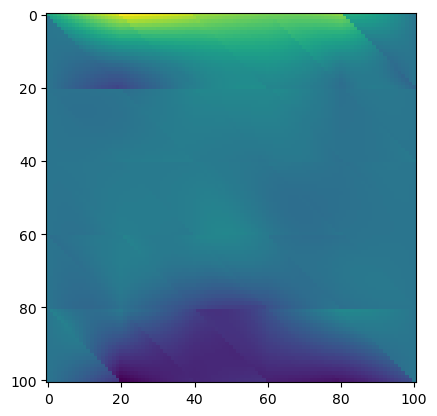

In [7]:
plt.imshow(Dx_1)

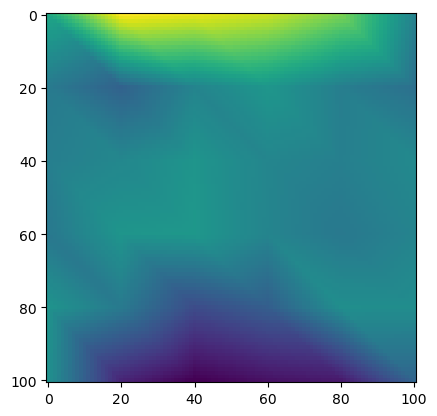

In [8]:
plt.imshow(Dx_2)

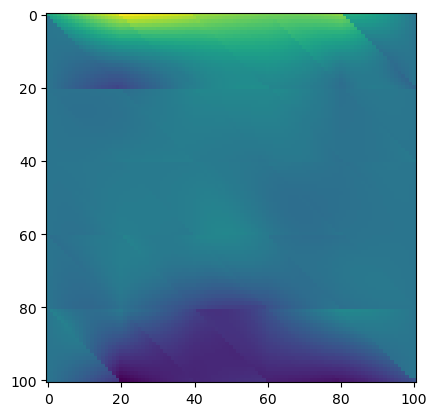

In [9]:
plt.imshow(FDx)

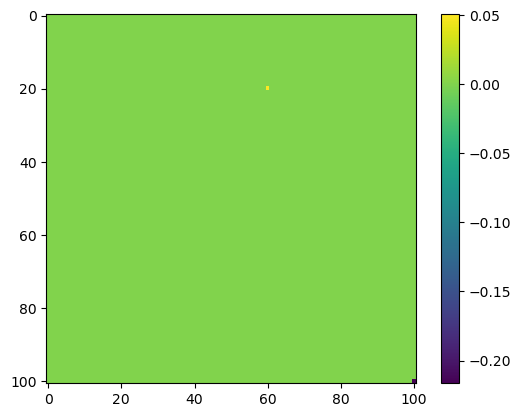

In [10]:
plt.imshow(FDx - Dx_1)
plt.colorbar()

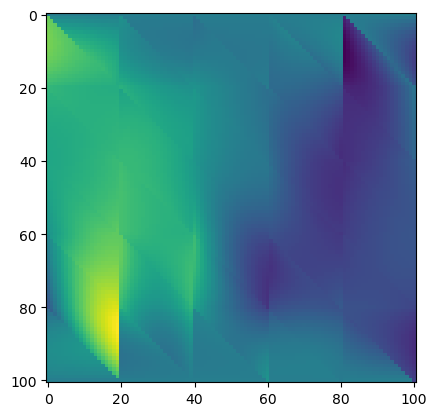

In [11]:
plt.imshow(Dy_1)

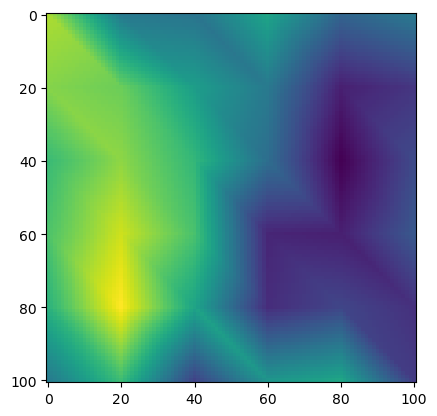

In [12]:
plt.imshow(Dy_2)

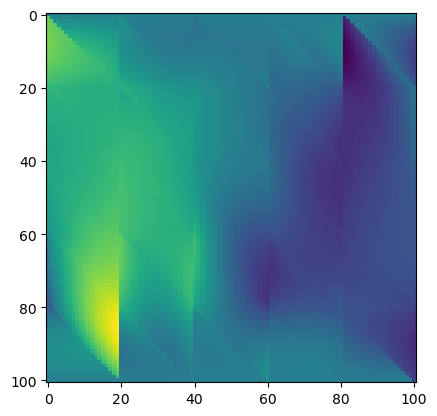

In [13]:
plt.imshow(FDy)

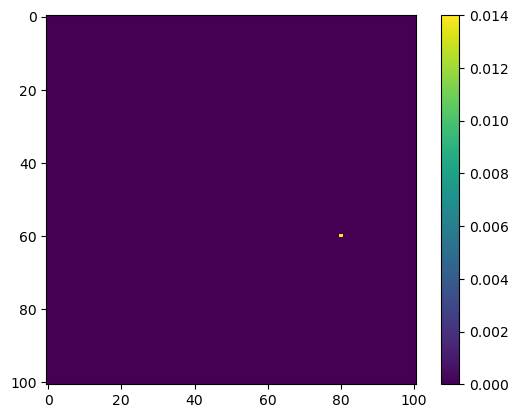

In [14]:
plt.imshow(FDy - Dy_1)
plt.colorbar()